In [ ]:
!rm -rf tesis_mapeo_distribucion

In [17]:
!git clone https://github.com/jsebastianquiroga/tesis_mapeo_distribucion.git

fatal: destination path 'tesis_mapeo_distribucion' already exists and is not an empty directory.


In [18]:
import sys
sys.path.append('/content/tesis_mapeo_distribucion/Final')

In [14]:
!pip install gurobipy 
!pip install umap
!pip install scikit-learn-extra
!pip install pingouin

In [2]:
from frontera_v4 import Frontera

2023-05-05 00:32:12.849330: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
import scipy.stats as stats
import pingouin as pg

import pandas as pd
from sklearn.datasets import make_blobs

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.io as pio
pio.renderers.default = 'iframe'

In [35]:
# Simulación de datos
# ==============================================================================
X, y = make_blobs(
        n_samples    = 600, 
        n_features   = 2, 
        centers      = 3, 
        cluster_std  = 1, 
        shuffle      = True, 
        random_state = 0
       )

In [42]:
X

array([[-0.31658683,  4.5708382 ],
       [ 1.64265316,  3.84306754],
       [ 0.8433895 ,  4.00599645],
       ...,
       [ 2.40704763,  1.27689919],
       [-2.15246105,  3.91001909],
       [ 1.90811845,  4.64375231]])

In [36]:
X.shape

(600, 2)

In [37]:
y.shape

(600,)

In [38]:
fig = go.Figure(data=[go.Scatter(x=X[:, 0], y=X[:, 1],
                                   mode='markers', 
                                   marker=dict(
                                    size=6,
                                    color=y,                # set color to an array/list of desired values
                                    #colorscale='picnic',   # choose a colorscale
                                    opacity=0.7)
                                  )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    plot_bgcolor='white',  # Fondo blanco
    #paper_bgcolor='white',  # Fondo blanco del papel
    margin=dict(l=0, r=0, b=0, t=10))
    
fig.show()

# LSH

In [62]:
%run frontera_v4.ipynb
frontera = Frontera(X, y, percentil_min=5, percentil_max=25, N_points_frontera=41, Closeness_Factor=1, method='LSH')

In [63]:
frontera.frontier()

(array([[ 1.26659827,  1.99230203],
        [ 1.4872335 ,  1.52899814],
        [-0.04387538,  2.07095722],
        [ 1.1133056 ,  3.1540884 ],
        [-0.67923322,  3.83718678],
        [-0.59077486,  3.59626236]]),
 [1, 1, 2, 0, 2, 2])

In [64]:
frontera.plot_frontera_2D(0,1)

# Rob

In [54]:
#from frontera_v4 import Frontera

In [39]:
%run frontera_v4.ipynb
frontera = Frontera(X,y,percentil_min=5, percentil_max=25, N_points_frontera=8, Closeness_Factor=1)
punto_frontera, labels = frontera.frontier()

med_std:  0.7463005901294897 134334.10622330813


In [43]:
punto_frontera

array([[-1.00926425,  4.57316359],
       [-0.25738088,  1.8574959 ],
       [ 0.25356862,  2.85411382],
       [ 0.89035246,  2.44872358],
       [ 2.06120273,  3.25113242],
       [ 3.41064354,  2.73333731]])

In [40]:
#frontera.plot_muestra_2D(0,1)

In [41]:
frontera.plot_frontera_2D(0,1)

In [7]:
# Obtén todas las matrices del diccionario
todas_las_matrices = list(frontera.dic_min_dst.values())

# Combina todas las matrices en una sola matriz utilizando np.concatenate
matriz_combinada = np.concatenate(todas_las_matrices)

# Obtener los índices de las filas únicas
matriz_combinada, indices = np.unique(matriz_combinada, axis=0, return_index=True)

In [19]:
df_1 = pd.DataFrame(matriz_combinada, columns=['X1', 'X2'])
df_1['muestra'] = 'Input'
df_2 = pd.DataFrame(punto_frontera, columns=['X1', 'X2'])
df_2['muestra'] = 'Output'

# Combina los DataFrames por filas utilizando concat()
df_combined = pd.concat([df_1, df_2])

In [44]:
df_combined

,X1,X2,muestra
0,-1.682902,4.910107,Input
1,-1.576720,4.957406,Input
2,-1.334040,1.760865,Input
3,-1.317055,1.677258,Input
4,-1.302652,1.239194,Input
...,...,...,...
1,-0.257381,1.857496,Output
2,0.253569,2.854114,Output
3,0.890352,2.448724,Output
4,2.061203,3.251132,Output


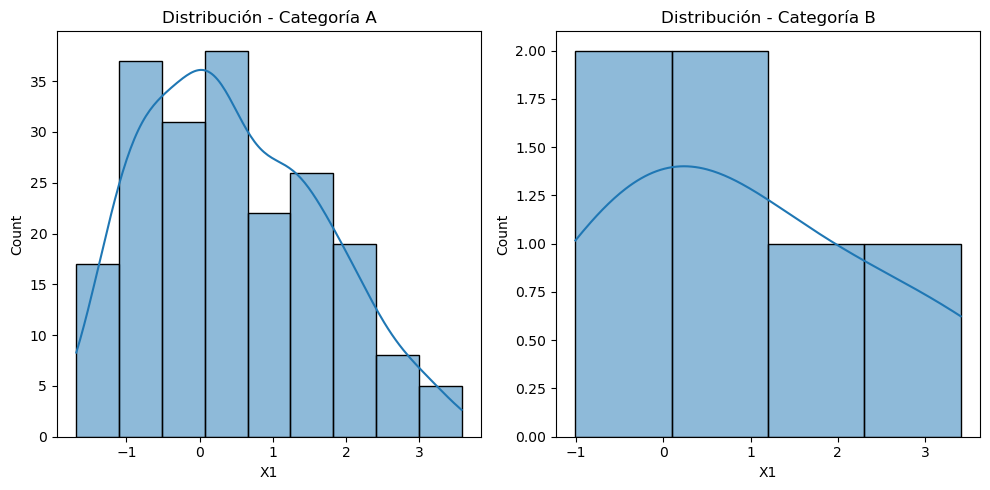

In [27]:
# Crear una figura y ejes para los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Gráfico de distribución para la categoría A
sns.histplot(data=df_combined[df_combined['muestra'] == 'Input'], x='X1', kde=True, ax=axes[0])
axes[0].set_title('Distribución - Categoría A')

# Gráfico de distribución para la categoría B
sns.histplot(data=df_combined[df_combined['muestra'] == 'Output'], x='X1', kde=True, ax=axes[1])
axes[1].set_title('Distribución - Categoría B')

# Ajustar los espacios entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [30]:
## Test de Normalidad
# Dividir los datos por categoría
datos_cat_A = df_combined.loc[df_combined['muestra'] == 'Input', 'X1']
datos_cat_B = df_combined.loc[df_combined['muestra'] == 'Output', 'X1']

# Realizar la prueba de bondad de ajuste para la categoría A
resultado_A = stats.kstest(datos_cat_A, 'norm')
p_valor_A = resultado_A.pvalue
print("Categoría A:")
print(f"Estadístico de prueba: {resultado_A.statistic}")
print(f"P-valor: {p_valor_A}")

# Realizar la prueba de bondad de ajuste para la categoría B
#resultado_B = stats.normaltest(datos_cat_B)
### Realizar pruebas de normalidad con 30 < datos quita potencia a la prueba
resultado_B = stats.shapiro(datos_cat_B)
p_valor_B = resultado_B.pvalue
print("Categoría B:")
print(f"Estadístico de prueba: {resultado_B.statistic}")
print(f"P-valor: {p_valor_B}")

Categoría A:
Estadístico de prueba: 0.1872982531712406
P-valor: 1.0434069081688686e-06
Categoría B:
Estadístico de prueba: 0.9648235440254211
P-valor: 0.856031060218811


In [31]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=df_combined, dv='X1', group='muestra', method='levene')

,W,pval,equal_var
levene,0.755643,0.385702,True


In [32]:
pg.homoscedasticity(data=df_combined, dv='X2', group='muestra', method='levene')

,W,pval,equal_var
levene,1.58646,0.209251,True


In [34]:
# U-test (p-value y tamaño de efecto)
# ==============================================================================
pg.mwu(x=datos_cat_A, y=datos_cat_B, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,524.0,two-sided,0.571654,0.139573,0.430213


# prototypes

In [106]:
%run frontera_v4.ipynb
frontera = Frontera(X,y,percentil_min=0, percentil_max=20, N_points_frontera=20, Closeness_Factor=1.9, method='prototypes')

In [107]:
frontera.frontier()

(array([[ 2.82667347,  1.92710249],
        [ 0.03182382,  3.89373763],
        [ 0.1216    ,  1.36786807],
        [ 2.01949945,  3.27840901],
        [ 1.81324769,  2.41592483],
        [-0.18108518,  3.99149508]]),
 [0, 0, 0, 0, 0, 0])

In [108]:
frontera.plot_frontera_2D(0,1)

# Medoids

In [129]:
%run frontera_v4.ipynb
frontera = Frontera(X,y,percentil_min=0, percentil_max=20, N_points_frontera=40, method='KM')

In [130]:
# optimal_k = 6
frontera.frontier()

KMedoids(n_clusters=6, random_state=42)


/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).



{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0}

In [131]:
frontera.plot_frontera_2D(0,1)

# MNIST

In [299]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# # Normalize the pixel values
#x_train = x_train / 255.0
#x_test = x_test / 255.0

# Flatten and transpose images
x_train_flat = x_train.reshape(x_train.shape[0], -1)
# x_test_flat = x_test.reshape(x_test.shape[0], -1).T

# Add labels as an additional column vector
y_train_col = y_train.reshape(1, y_train.shape[0]).T
# y_test_col = y_test.reshape(1, y_test.shape[0])

#train_data = np.vstack((x_train_flat, y_train_col))
# test_data = np.vstack((x_test_flat, y_test_col))

In [300]:
x_train.shape

(60000, 28, 28)

In [301]:
# Fijamos una semilla para el generador de números aleatorios
semilla = 42

# Creamos un objeto generador de números aleatorios con la semilla fijada
rng = np.random.RandomState(semilla)

# Generamos una permutación aleatoria de los índices de ambos arrays
indices_perm = rng.permutation(1000)

# Obtenemos las muestras aleatorias utilizando los índices permutados
muestra_array1 = x_train_flat[indices_perm]/255.0
muestra_array2 = y_train_col[indices_perm]

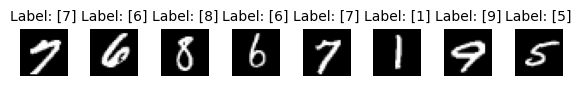

In [332]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images=8):
    fig, axes = plt.subplots(1, num_images, figsize=(7, 7))
    axes = axes.ravel()

    for i in range(num_images):
        axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}", fontsize=10)
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

# Display first 10 filtered images from the training set
display_images(muestra_array1, muestra_array2)
plt.show()

In [303]:
#muestra_array2 = muestra_array2.reshape(1,-1)
print(muestra_array1.shape)
print(muestra_array2.shape)

(1000, 784)
(1000, 1)


In [311]:
%run frontera_v4.ipynb
frontera = Frontera(muestra_array1,muestra_array2,percentil_min=0, percentil_max=20)

In [312]:
vec, lab = frontera.frontier()

med_std:  0.00038071222866744453 68.52820116014001


In [313]:
frontera.dic_categorias.get('X_0').shape

(97, 784)

In [314]:
frontera.dic_min_dst.get('X_0_with_X_1').shape

(19, 784)

In [315]:
frontera.Frontier_Point_A_X.get('FrontPoints:(0,X)').shape

(171, 784)

In [316]:
frontera.Frontier_Point.get('Frontier:(0,X)').shape

(3, 784)

In [317]:
frontera.Frontier_Point.get('Frontier: ALL').shape

(22, 784)

In [318]:
vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [319]:
lab

[0, 0, 0, 1, 2, 2, 2, 3, 3, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9, 9, 9]

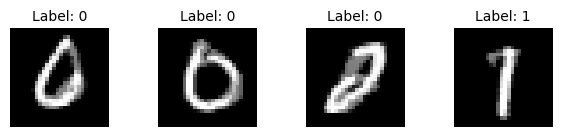

In [333]:
display_images(vec[0:], lab[0:],num_images=4)
plt.show()

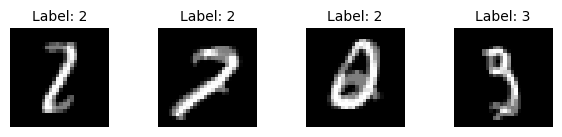

In [335]:
display_images(vec[4:], lab[4:],num_images=4)
plt.show()

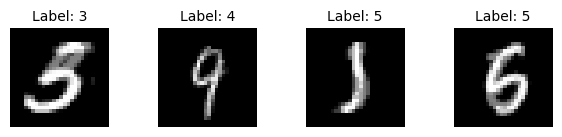

In [336]:
display_images(vec[8:], lab[8:],num_images=4)
plt.show()

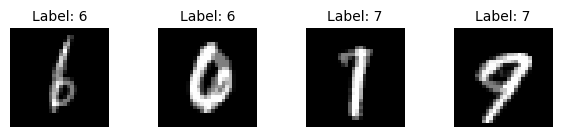

In [337]:
display_images(vec[12:], lab[12:],num_images=4)
plt.show()

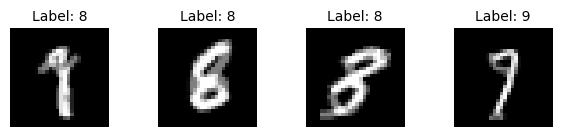

In [339]:
display_images(vec[16:], lab[16:],num_images=4)
plt.show()

In [154]:
# Obtener las imágenes originales
original_images = vec.reshape((22, 28, 28))

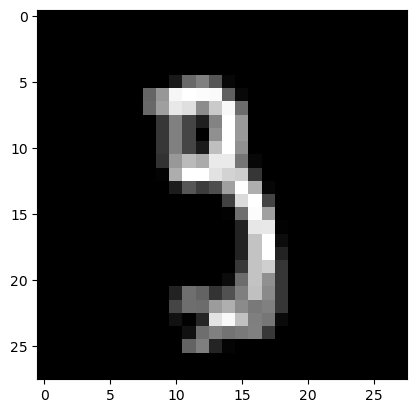

In [169]:
# Obtener el índice de la imagen a graficar
index = 0  # Cambia esto según el índice que desees graficar

# Obtener la imagen correspondiente al índice seleccionado
image = original_images[index]

# Graficar la imagen
plt.imshow(image, cmap='gray')
plt.show()

In [195]:
frontera.plot_muestra_2D( int(600/2),int(600/2+1) )

In [ ]:
frontera.plot_frontera_2D( int(600/2),int(600/2+1) )

In [ ]:
frontera.plot_UMAP()

## IRIS

In [132]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [133]:
# Cargar el dataset de iris
iris = load_iris()

# Obtener las características (X) como una matriz NumPy
X = iris.data

# Obtener las etiquetas (y) como una matriz NumPy
y = iris.target

In [134]:
# Imprimir las formas de las matrices
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (150, 4)
Forma de y: (150,)


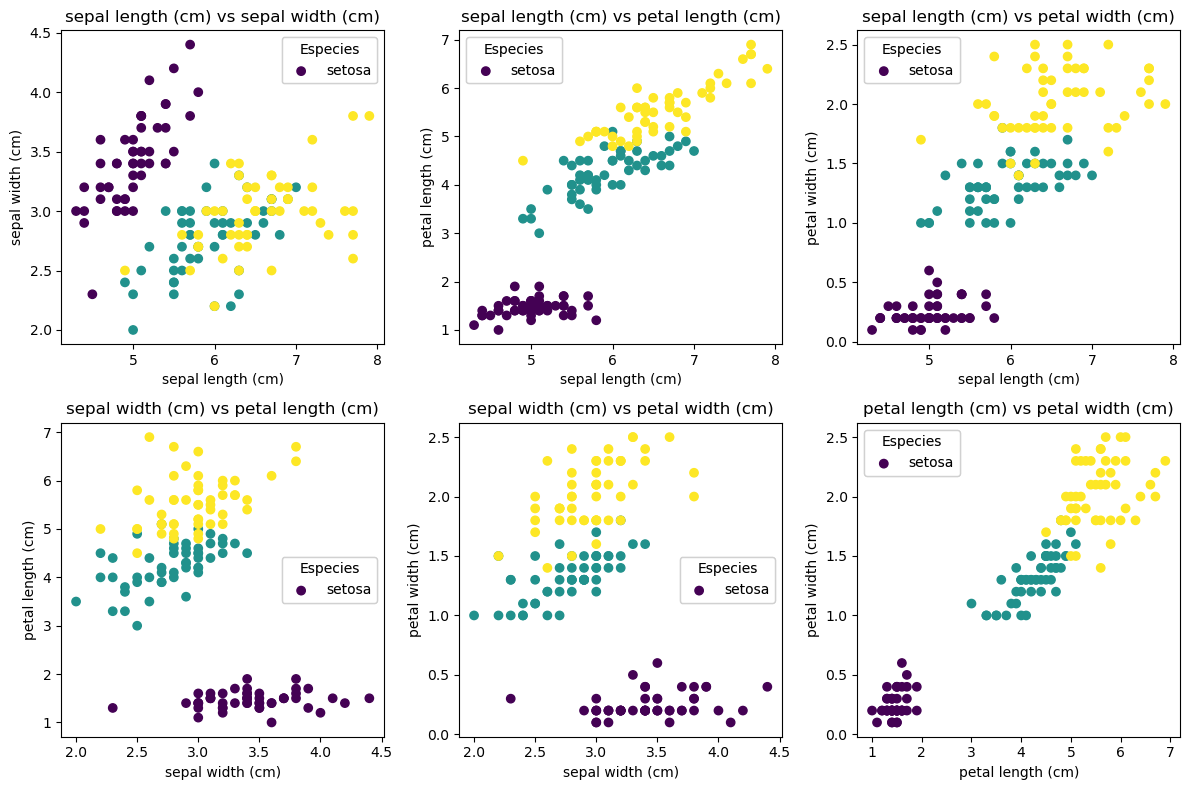

In [135]:
# Crear un diagrama de dispersión para cada par de características usando subplot
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Índices de las características
feature_indices = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Pintar los scatter plots en los subplots correspondientes
for i, (x_index, y_index) in enumerate(feature_indices):
    ax = axes[i // 3, i % 3]
    ax.scatter(X[:, x_index], X[:, y_index], c=y, cmap='viridis')
    ax.set_xlabel(iris.feature_names[x_index])
    ax.set_ylabel(iris.feature_names[y_index])
    ax.set_title(f"{iris.feature_names[x_index]} vs {iris.feature_names[y_index]}")
    legend = ax.legend(iris.target_names, title="Especies")
    ax.add_artist(legend)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los scatter plots
plt.show()

In [136]:
# Entrenar un árbol de decisión
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Obtener la importancia de las características
importance = clf.feature_importances_

# Imprimir la importancia de las características
for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {importance[i]}")

sepal length (cm): 0.013333333333333329
sepal width (cm): 0.0
petal length (cm): 0.06405595813204505
petal width (cm): 0.9226107085346216


In [137]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Robins

In [161]:
%run frontera_v4.ipynb

frontera = Frontera(X,y,percentil_min=5, percentil_max=25, N_points_frontera=2, Closeness_Factor=1 )
frontera.frontier()

med_std:  0.2329529735786203 41931.53524415165


(array([[5.55, 3.  , 2.6 , 0.6 ],
        [5.9 , 3.1 , 4.95, 1.8 ],
        [6.  , 3.1 , 4.85, 1.8 ],
        [6.3 , 2.6 , 4.9 , 1.65]]),
 [0, 1, 2, 1])

In [162]:
frontera.plot_frontera_2D(2,3)

### LSH

In [177]:
%run frontera_v4.ipynb
frontera = Frontera(X, y ,percentil_min=0, percentil_max=20, N_points_frontera=41, method='LSH')

In [178]:
frontera.frontier()

(array([[5.50526316, 3.41052632, 2.13157895, 0.54736842],
        [4.8       , 3.4       , 1.9       , 0.2       ],
        [6.075     , 2.95      , 4.475     , 1.625     ],
        [5.84827586, 2.66206897, 4.58275862, 1.54482759]]),
 [0, 0, 0, 0])

In [179]:
frontera.centroids.get('Centroid Group: 0')

array([5.50526316, 3.41052632, 2.13157895, 0.54736842])

In [180]:
frontera.plot_frontera_2D(2,3)

## Prototypes

In [181]:
%run frontera_v4.ipynb
frontera = Frontera(X,y,percentil_min=0, percentil_max=20, N_points_frontera=5, Closeness_Factor=3, method='prototypes')

In [182]:
frontera.frontier()

(array([[5.4, 3.4, 1.7, 0.2],
        [5.5, 2.4, 3.7, 1. ],
        [6.9, 3.1, 4.9, 1.5],
        [5.8, 2.7, 5.1, 1.9]]),
 [0, 0, 0, 0])

In [183]:
frontera.plot_frontera_2D(2,3)

# Kmedoids

In [186]:
%run frontera_v4.ipynb
frontera = Frontera(X,y,percentil_min=0, percentil_max=20, N_points_frontera=40, method='KM')

In [187]:
# optimal_k = 4
frontera.frontier()

KMedoids(n_clusters=4, random_state=42)


/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).

/opt/conda/lib/python3.10/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning:

Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).



{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0}

In [188]:
frontera.plot_frontera_2D(2,3)

### prototypes

In [ ]:
# Get the selected prototypes and their labels
prototypes = frontera.w_
prototype_labels = frontera.c_w_

# Plot the data points and prototypes
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Spectral, alpha=0.5)
plt.scatter(prototypes[:, 0], prototypes[:, 1], c='black', marker='X', s=200, label='Prototypes')

# Customize the plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset and Prototypes')

# Show the plot
plt.show()